In [182]:
# Input libaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.figure_factory as ff
import seaborn as sb
sb.set(style="whitegrid")

%matplotlib inline


In [199]:
class task:
    def __init__(self,dur1,prob1=1,dur2=0,prob2=0,dur3=0,prob3=0):
        self.dur1=dur1
        self.prob1=prob1
        self.dur2=dur2
        self.prob2=prob2
        self.dur3=dur3
        self.prob3=prob3
        self.state=0
        self.check_prob()
    
    def check_prob(self):
        if self.prob1+self.prob2+self.prob3>1.01:
            print('Wahrscheinlichkeiten > 100%, neue Definition notwendig')
            self.state=1
        if self.prob1+self.prob2+self.prob3<0.91:
            print(self.prob1+self.prob2+self.prob3)
            print('Wahrscheinlichkeiten < 100%, neue Definition notwendig')
            self.state=1
        return
        
    def sum_duration(self):            
        N=100000
        self.sum_dur = np.zeros(N, dtype=int)
        for i in range(N):
            self.sum_dur[i] = self.monte_carlo_dur()
        return self.sum_dur

    def monte_carlo_dur(self):
        u = np.random.uniform()
        if u < self.prob1: return self.dur1
        if u < self.prob1+self.prob2: return self.dur2
        return self.dur3     

In [200]:
task_versuch=task(9,0.7,8,0.1,11,0.2)

In [185]:
task_bericht=task(5,0.8,4,0.1,7,0.1)

In [227]:
def create_barplot(sum_array,header=None,x_axis=None,y_axis=None,color='#1FA4C1'):
    list=[]
    for i in range (0,102,2):
        list.append(i)


    prob=pd.DataFrame(columns=['Wahrscheinlichkeit','Tage'],index=list )

    for i in range (0,102,2):
        prob.at[i,'Wahrscheinlichkeit']=str(i)+'%'
        prob.at[i,'Tage']=np.percentile(sum_array,i)
    
    fig = plt.figure(figsize=(14, 4)) 
    ax=fig.add_subplot(111)
    ax.set_title(header, fontsize=12)
    sb.barplot(x=prob.index, y=prob['Tage'], color='#1FA4C1')
    plt.xticks(fontsize=10)   
    plt.xlabel(x_axis, fontsize=12)
    plt.ylabel(y_axis, fontsize=12)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



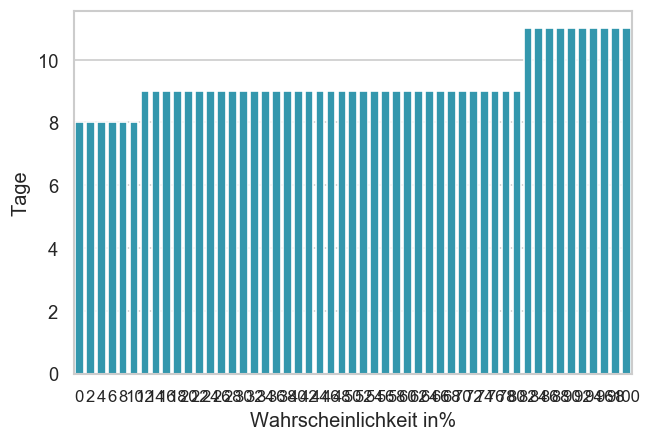

In [228]:
create_barplot(task_versuch.sum_duration(),header='Prozess Versuch',x_axis='Wahrscheinlichkeit in%',y_axis='Tage')

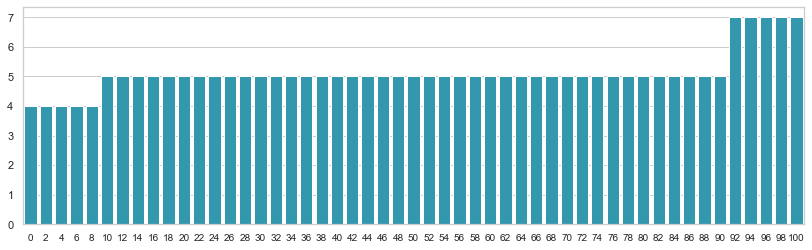

In [188]:
create_barplot(task_bericht.sum_duration())

In [189]:
summary_dur=task_versuch.sum_duration() + task_bericht.sum_duration()

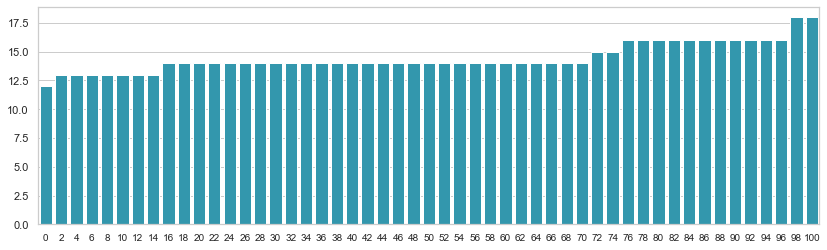

In [190]:
create_barplot(summary_dur)

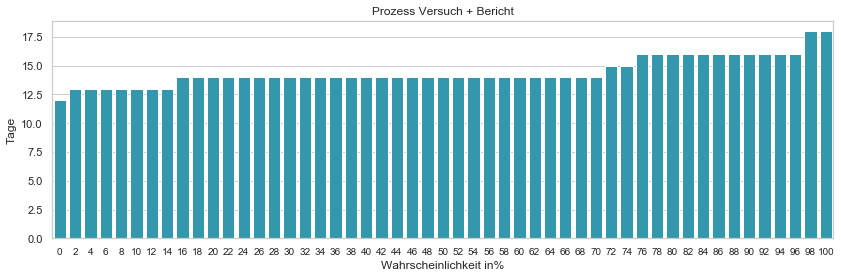

In [193]:
create_barplot(summary_dur,header='Prozess Versuch + Bericht',x_axis='Wahrscheinlichkeit in%',y_axis='Tage')

In [204]:
task_freigabe=task(3,0.6,2,0.3,6,0.1)
task_produktlaunch=task(5,0.7,4,0.2,7,0.1)

summary_dur=task_versuch.sum_duration() + task_bericht.sum_duration() + max(task_freigabe.sum_duration()+task_produktlaunch.sum_duration())

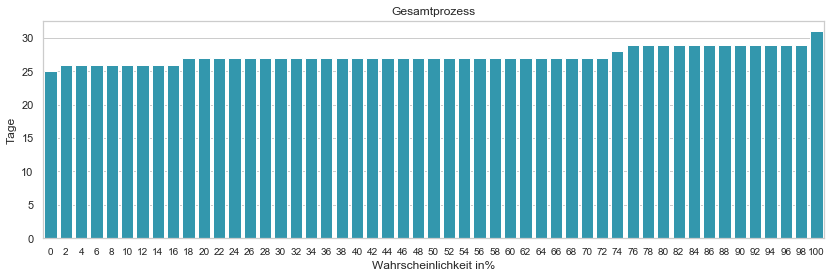

In [205]:
create_barplot(summary_dur,header='Gesamtprozess',x_axis='Wahrscheinlichkeit in%',y_axis='Tage')

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [216]:
list=[]
for i in range (0,102,2):
    list.append(i)
prob=pd.DataFrame(columns=['Wahrscheinlichkeit','Tage'],index=list )

for i in range (0,102,2):
    prob.at[i,'Wahrscheinlichkeit']=str(i)+'%'
    prob.at[i,'Tage']=np.percentile(summary_dur,i)
print(prob.at[90,'Tage'])

29.0


In [209]:
#prob.to_excel('prob.xlsx')

In [214]:
print(prob.at[50,'Tage'])

27.0
